# Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


# Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not?


In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category = FutureWarning)
import os
os.chdir("/Users/arunh/Documents/Python_Project_Data/Capstone project")
pd.set_option('display.max_columns', None)


In [2]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_roc_curve,f1_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Read the file from the directory

diab = pd.read_csv('health care diabetes.csv')
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
•	Glucose
•	BloodPressure
•	SkinThickness
•	Insulin
•	BMI


In [4]:
# find the statistical detials of the independent variables

diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Check if there is any null values in the data set
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diab.shape

(768, 9)

In [7]:
# segregating the independent columns alone
independent_variable = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [8]:
# find how many colums are there with data as 0. zero makes no sense for these data set.
print("Number of zero values in each independent variables are")
for var in independent_variable:
    zero_count = (diab[var] == 0).sum()

    print(var , "=" ,zero_count)

Number of zero values in each independent variables are
Pregnancies = 111
Glucose = 5
BloodPressure = 35
SkinThickness = 227
Insulin = 374
BMI = 11
DiabetesPedigreeFunction = 0
Age = 0


In [9]:
rows_with_zero = diab[(diab[independent_variable] == 0).any(axis=1)]
rows_with_zero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
# Take a copy of the original data set
diab1 = diab.copy(deep=True)

In [11]:
diab1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
# Replace 0's with nan values
diab1[diab1[independent_variable] == 0] = np.nan

In [13]:
diab1.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# since there are more missing values , we will impute them with out medain values.
diab1[independent_variable].median()

Pregnancies                   4.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

# 2.	# Visually explore these variable, you may need to look for the distribution of these variables using histograms. 
# Treat the missing values accordingly.

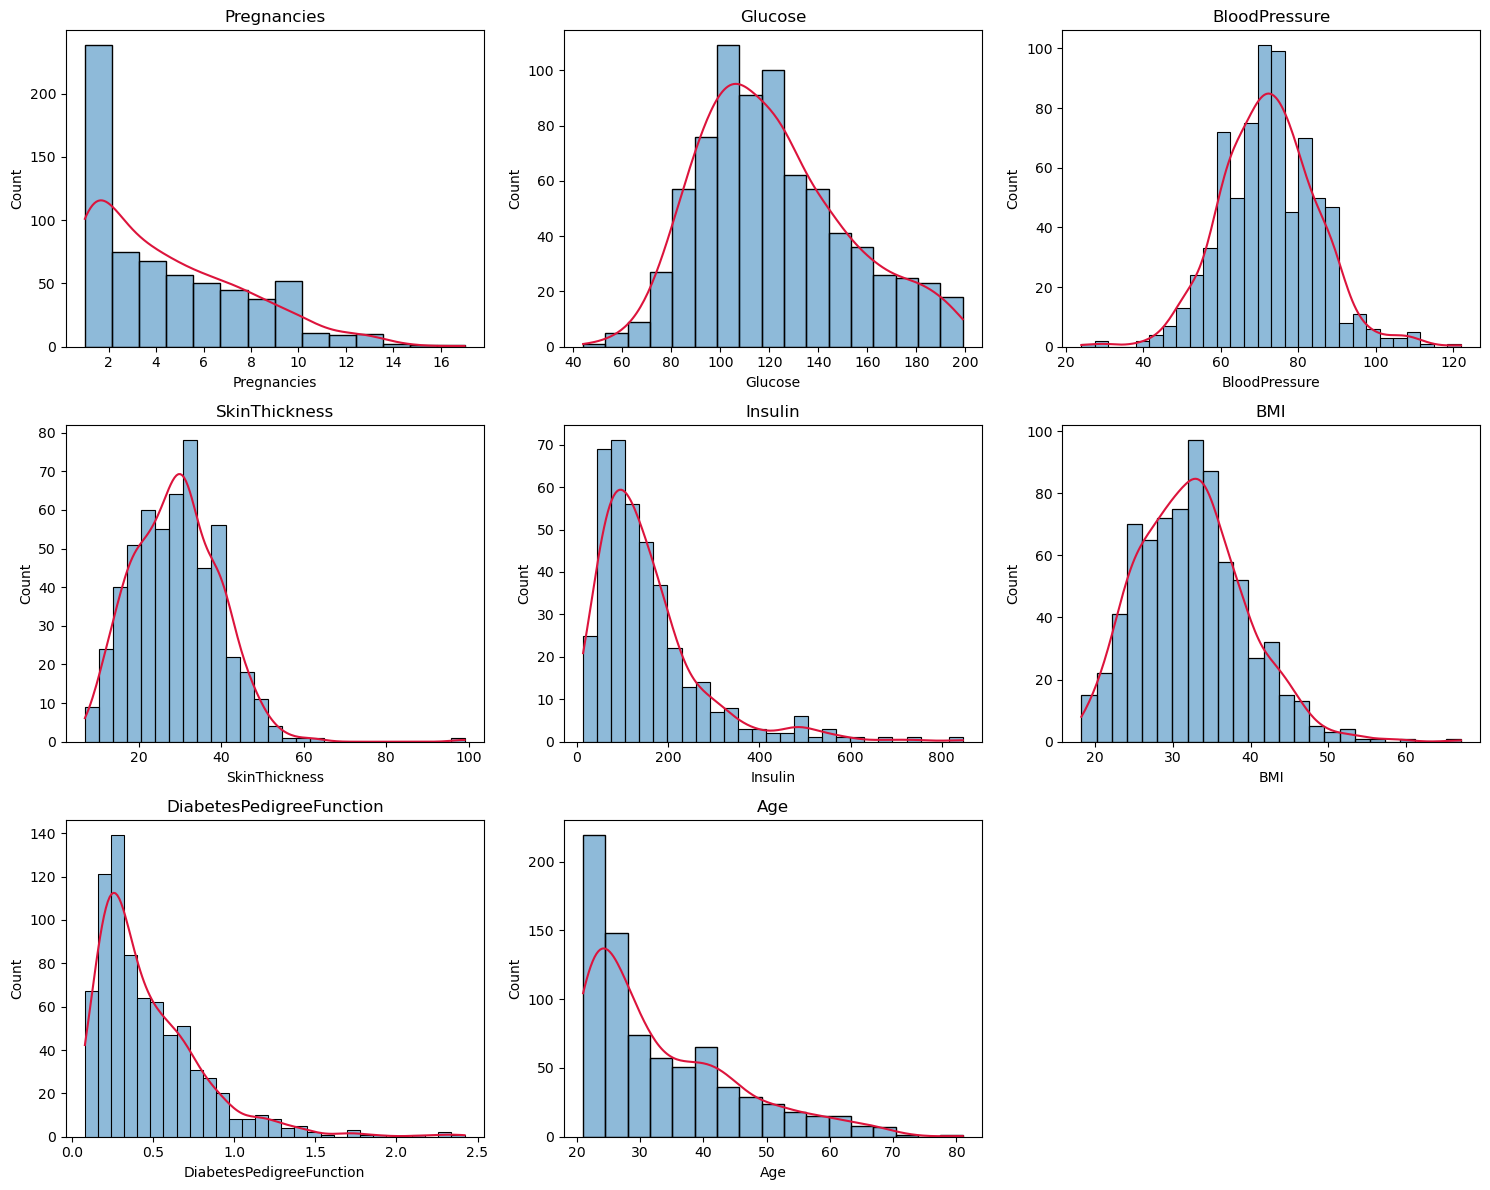

In [15]:

# mean while lets check the distribution of the variables
plt.figure(figsize=(15, 12))
for i, dist in enumerate(independent_variable):
    plt.subplot(3, 3, i + 1)
    sns.histplot(diab1[dist], kde = True ).lines[0].set_color('crimson')
    plt.title(dist)

plt.tight_layout()
plt.show()

In [16]:
# There is skewness in data for many independent variables.
# we will impute the null values with median and so the data is not largely affected with outliers.

# Treating null values using Simple Imputer with Median Strategy
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')

diab2 = pd.DataFrame(impute.fit_transform(diab1), columns = diab1.columns)

diab2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3 , We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [17]:
# the diab2 dataset set which is after imputing diab1 data with median
diab2.dtypes.value_counts()

float64    9
dtype: int64

In [18]:
# checking the data type count before median imputations
diab1.dtypes.value_counts()

float64    7
int64      2
dtype: int64

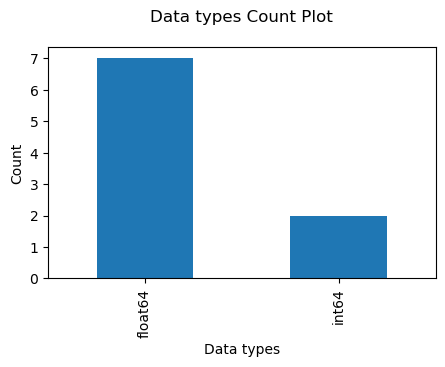

In [19]:
# Checking diab1 data set with a frequency plot
diab1.dtypes.value_counts().plot(kind='bar', figsize=(5,3),title = 'Data types Count Plot\n', xlabel='Data types', ylabel= 'Count' )
plt.show()

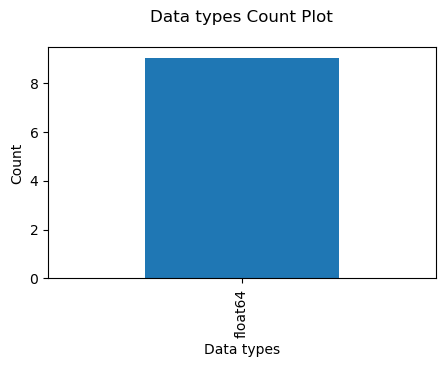

In [20]:
# Checking diab2 data set with a frequency plot
diab2.dtypes.value_counts().plot(kind='bar', figsize=(5,3),title = 'Data types Count Plot\n', xlabel='Data types', ylabel= 'Count' )
plt.show()

 So after imputing the missing values with median values , we can see that all the data types are now float

# 4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

In [21]:
tot_out = diab2['Outcome'].value_counts()
tot_out

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [22]:
tot_sum = tot_out.sum()

In [23]:
percent_cont = (tot_out/ tot_sum)*100
percent_cont

0.0    65.104167
1.0    34.895833
Name: Outcome, dtype: float64

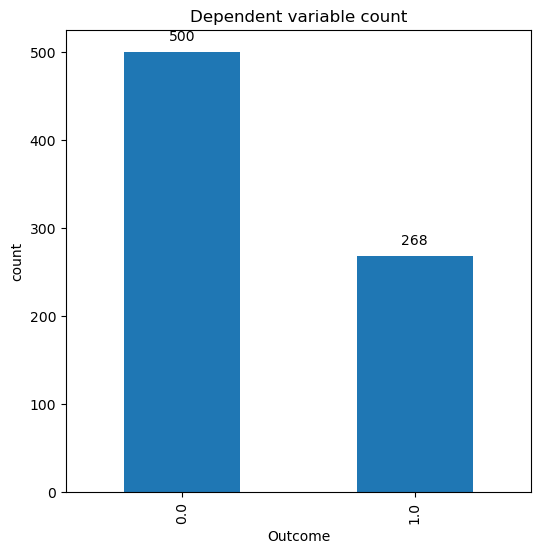

In [24]:
plt.figure(figsize=(6,6))
ax = diab2['Outcome'].value_counts().plot(kind='bar', title = 'Dependent variable count')

plt.xlabel('Outcome')
plt.ylabel('count')
import matplotlib.pyplot as plt

# Add count values above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 10),
                ha='center', va='bottom')

plt.show()

In [25]:
# 65 % of the outome is 0 & 35 % of the outcome is 1 

# 5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

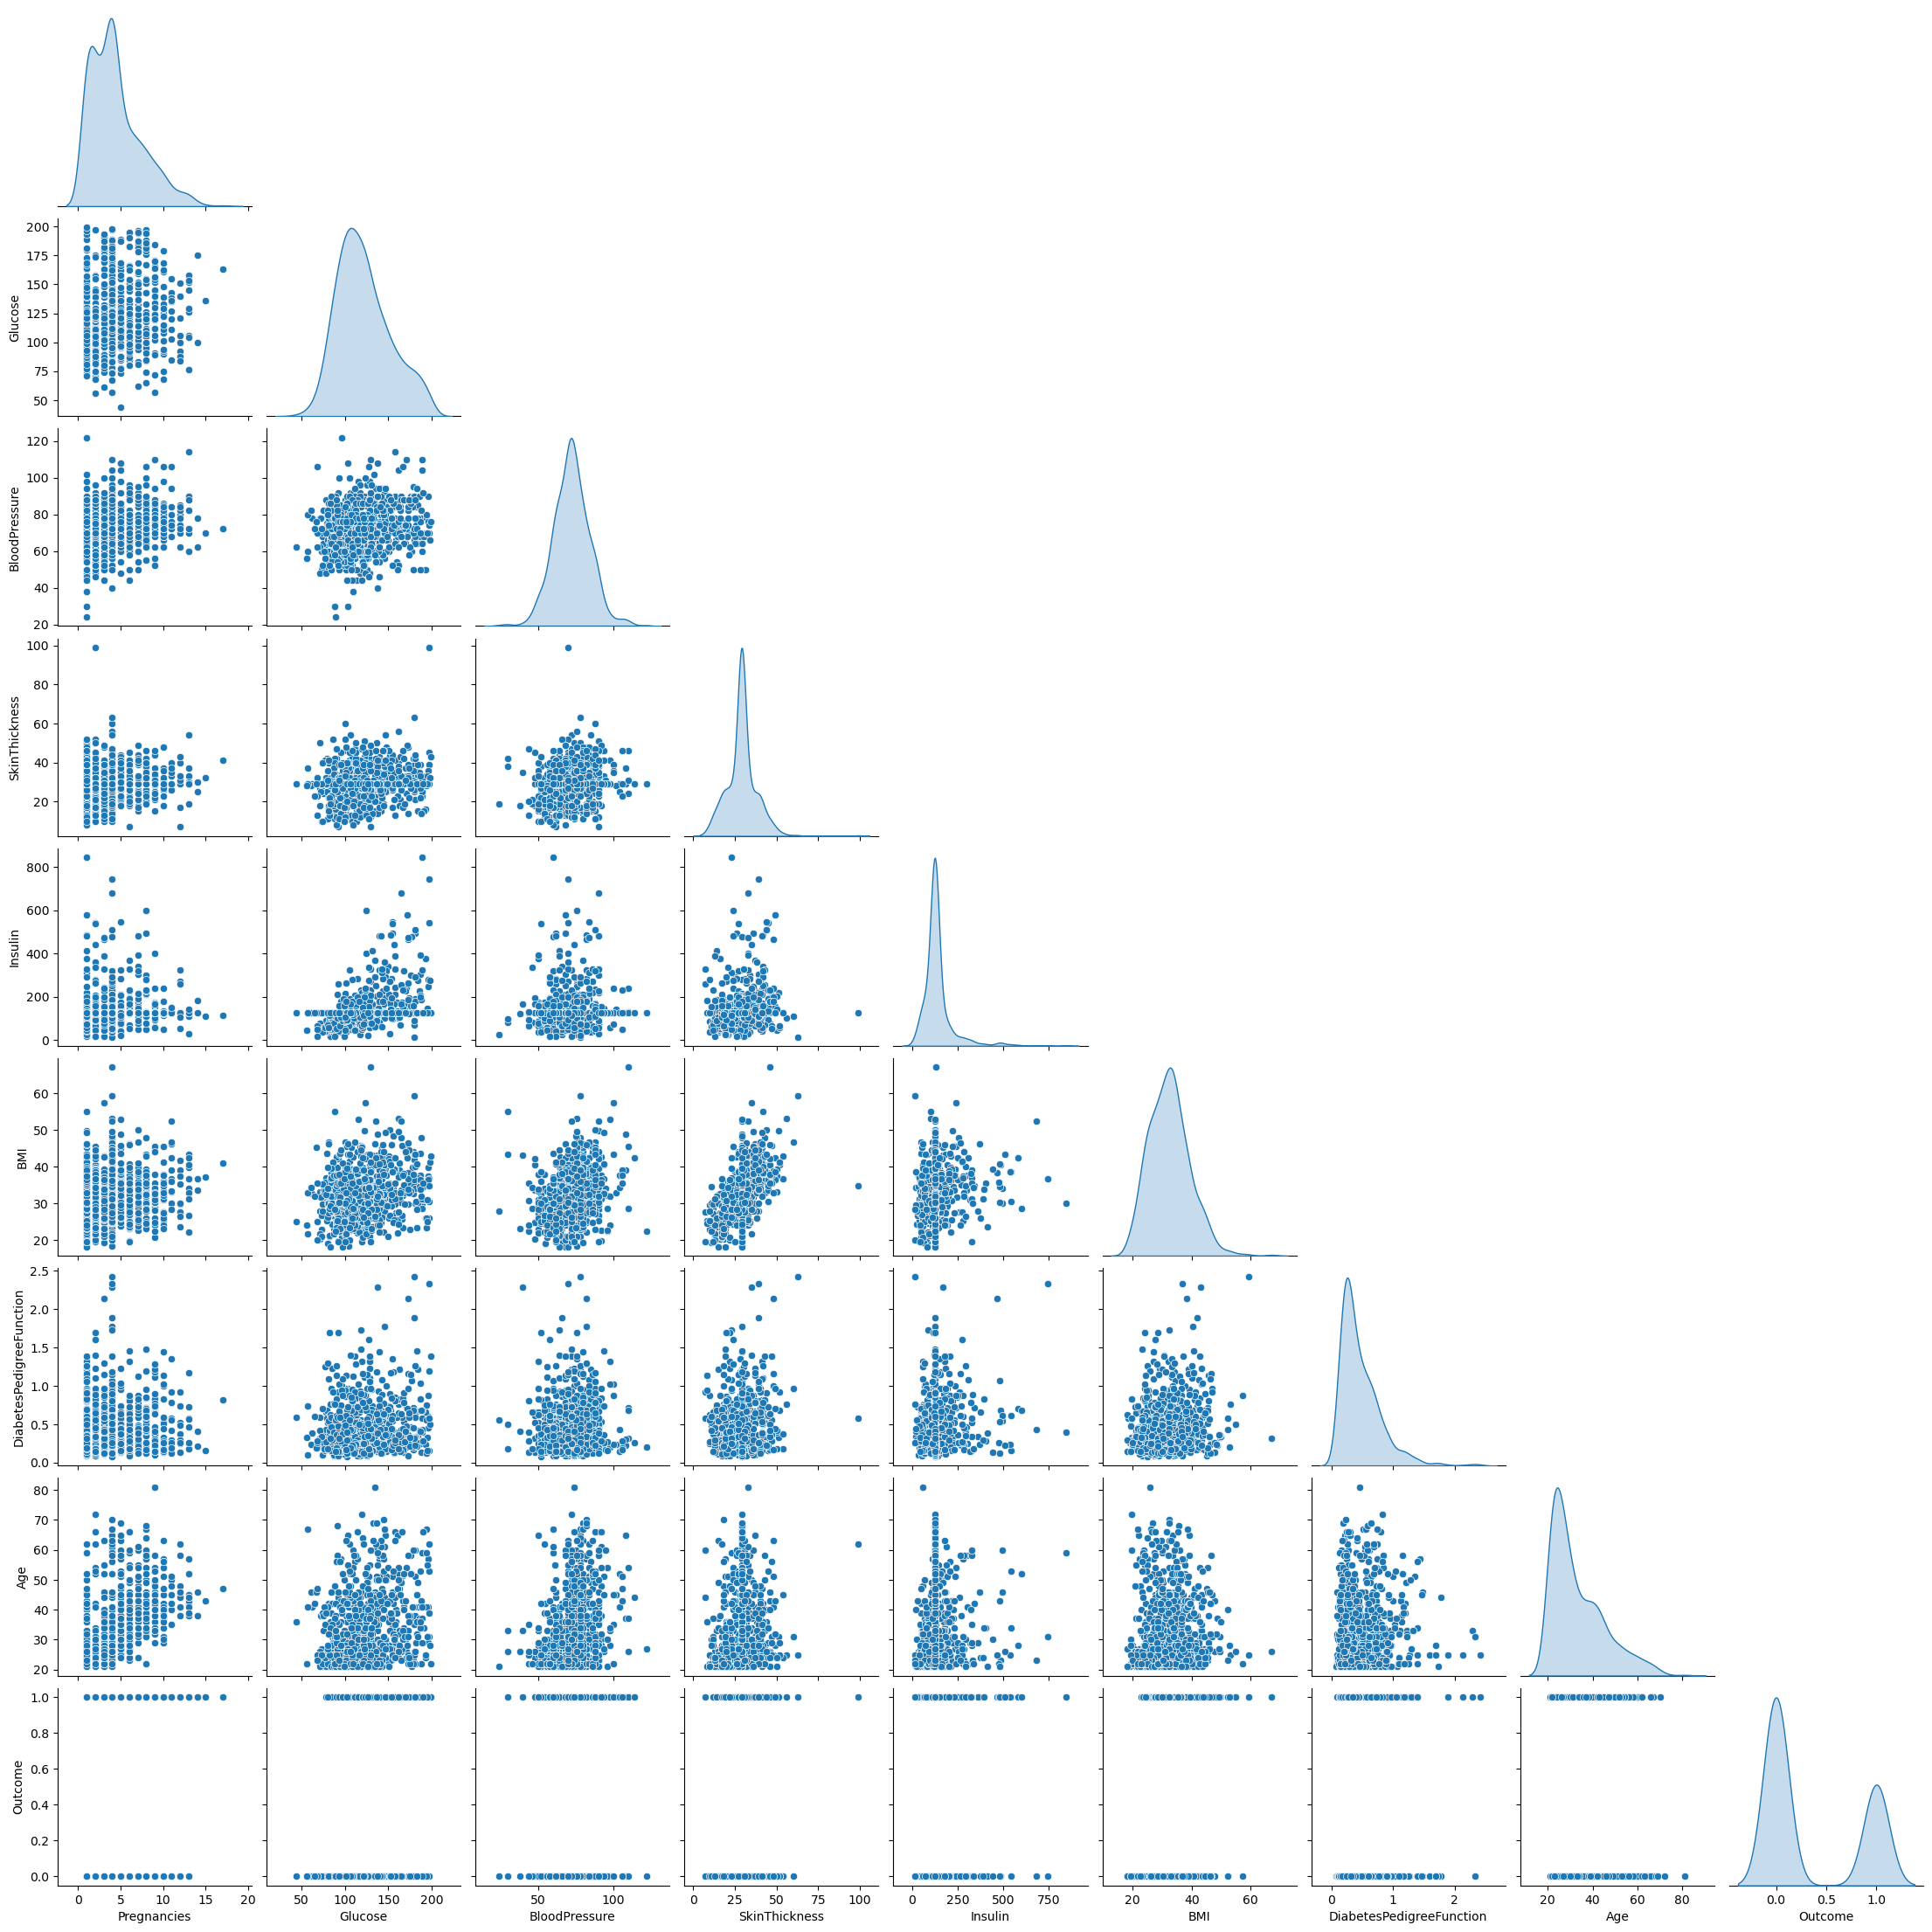

In [26]:
sns.pairplot(data = diab2, kind='scatter', diag_kind='kde', corner=True)
plt.show()

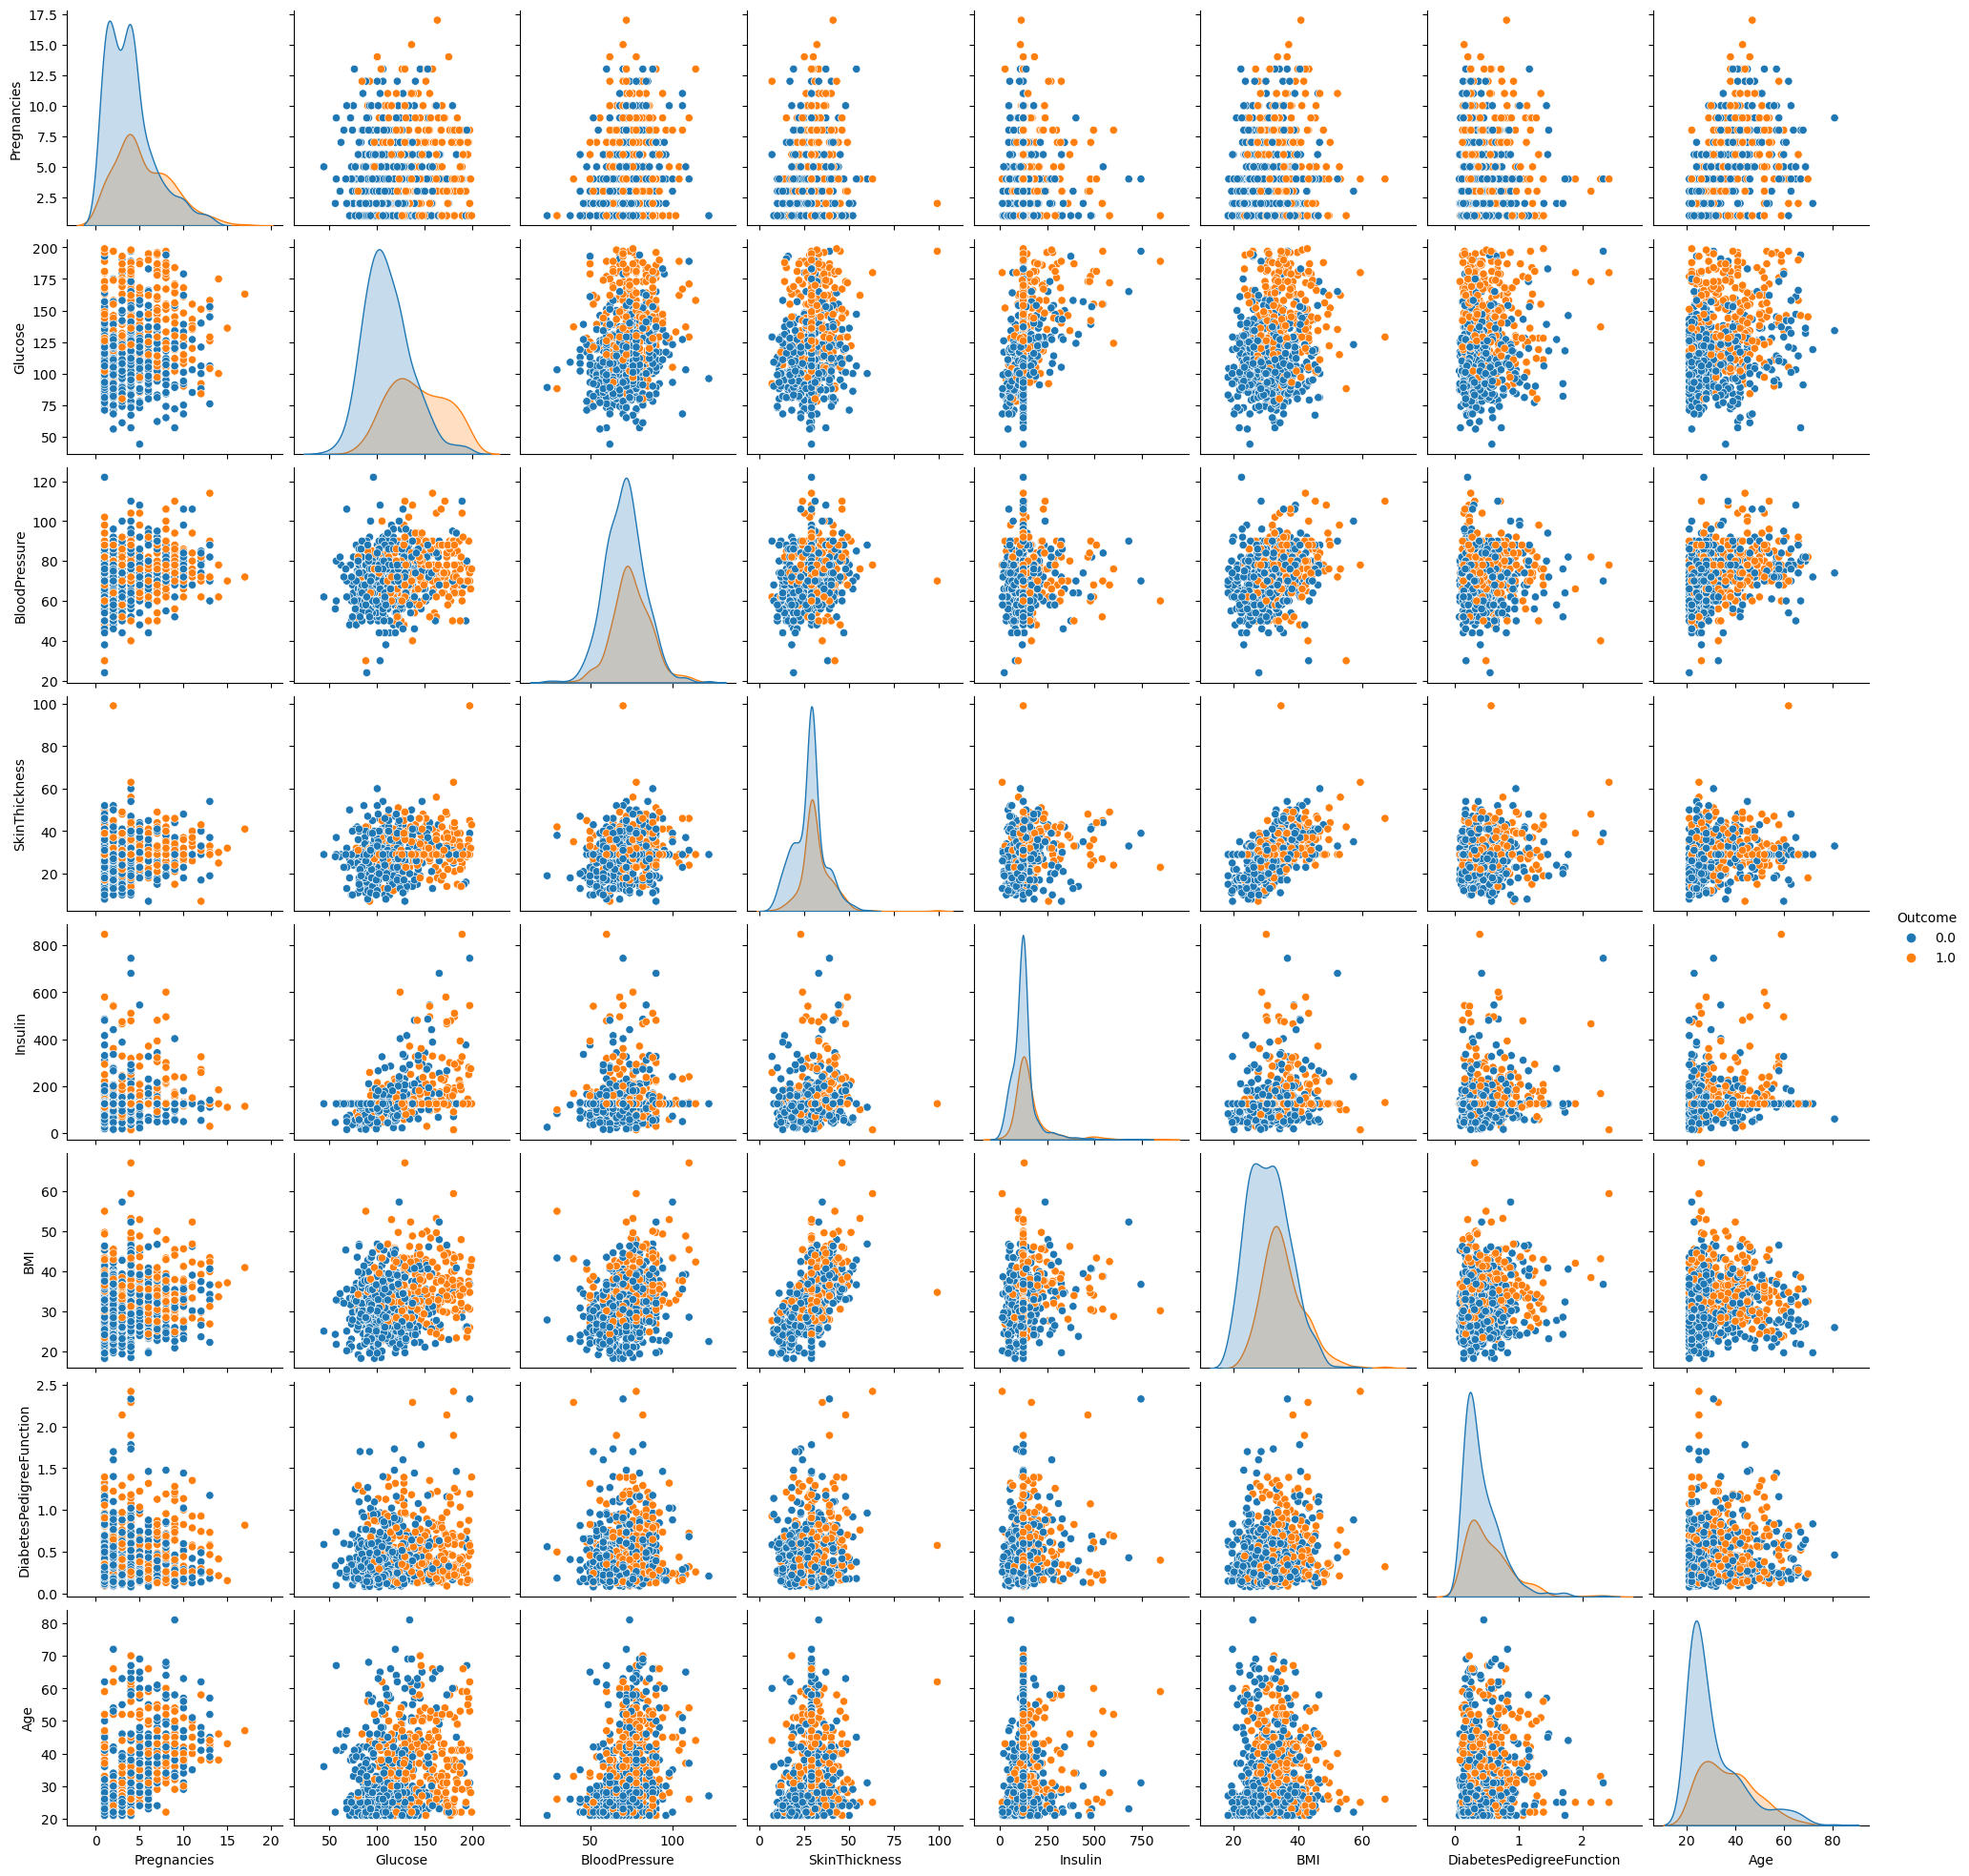

In [27]:
sns.pairplot(data = diab2, kind='scatter', diag_kind='kde', hue ='Outcome')
plt.show()

# 6.	Perform correlation analysis. Visually explore it using a heat map.

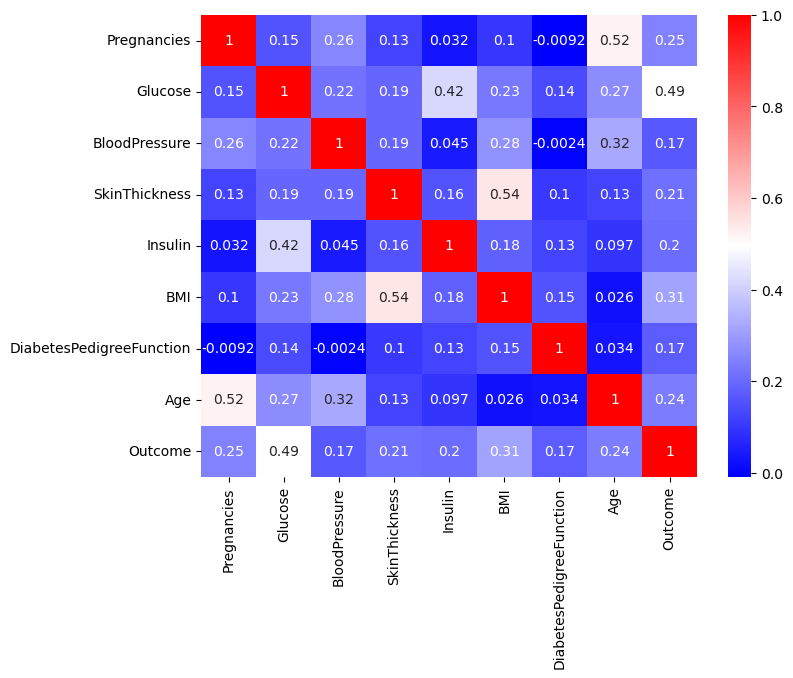

In [28]:
#Correlation analysis using Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(diab2.corr(), cmap='bwr',annot = True)
plt.show()

# 7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

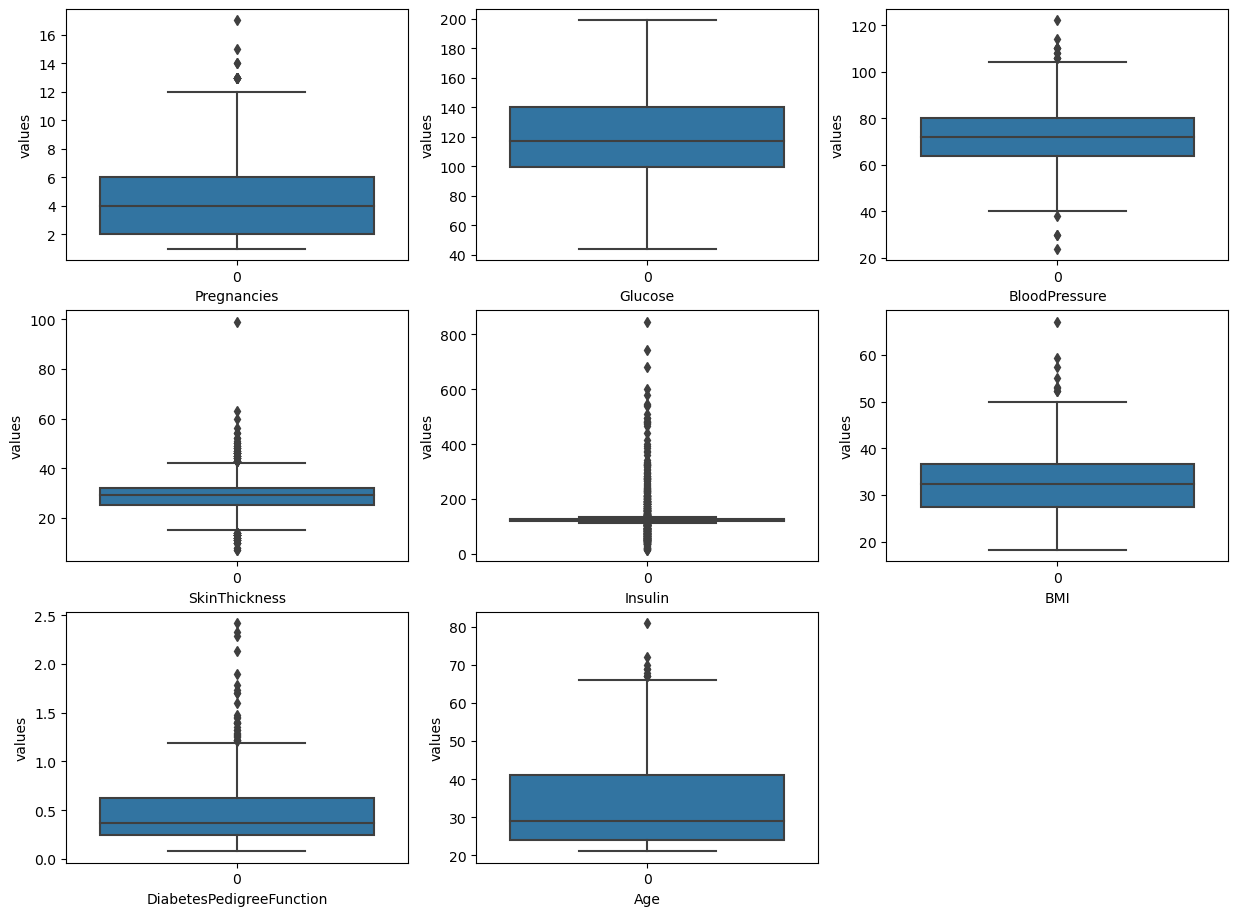

In [29]:
# Check for outliers
plt.figure(figsize=(15, 15))
for j , outlier in enumerate(independent_variable):
    ax = plt.subplot(4,3,j+1)
    sns.boxplot(diab2[outlier])
    ax.set_xlabel(outlier)
    ax.set_ylabel("values")
    
   

In [30]:
# Insulin seems to have lot off outliers.

#Treating Outliers In "Insulin"
#we are changing the quantile value to 85% and 15% as there are lot of outliers with 75% and 25% and we dont want to lose lot of information capping them.

Q3 = diab2.Insulin.quantile(0.85)
Q1 = diab2.Insulin.quantile(0.15)
IQR = Q3-Q1
upper = Q3 + 1.5 * (IQR)
lower = Q3 - 1.5 * (IQR)
print(lower,upper)

39.12500000000006 320.67499999999967


In [31]:
#index of outliers
index_upper = diab2[diab2.Insulin > upper].index
index_lower = diab2[diab2.Insulin < lower].index



In [32]:
diab2.loc[index_upper,'Insulin']

8      543.0
13     846.0
54     342.0
111    495.0
139    325.0
153    485.0
186    495.0
220    478.0
228    744.0
231    370.0
247    680.0
248    402.0
258    375.0
286    545.0
296    360.0
360    325.0
370    465.0
375    325.0
392    415.0
409    579.0
415    474.0
480    328.0
486    480.0
519    326.0
574    330.0
584    600.0
612    321.0
645    440.0
655    540.0
695    480.0
707    335.0
710    387.0
715    392.0
753    510.0
Name: Insulin, dtype: float64

In [33]:
diab2.loc[index_lower,'Insulin']

51     36.0
52     23.0
68     38.0
108    18.0
109    36.0
112    37.0
182    23.0
225    32.0
232    37.0
323    29.0
445    14.0
466    36.0
566    18.0
597    25.0
617    15.0
711    22.0
760    16.0
Name: Insulin, dtype: float64

In [34]:
#Capping to upper and lower values
diab2.loc[index_upper,'Insulin'] = upper
diab2.loc[index_lower,'Insulin'] = lower

In [35]:
print(diab2.loc[index_upper,'Insulin'])
print("next")
print(diab2.loc[index_lower,'Insulin'])

8      320.675
13     320.675
54     320.675
111    320.675
139    320.675
153    320.675
186    320.675
220    320.675
228    320.675
231    320.675
247    320.675
248    320.675
258    320.675
286    320.675
296    320.675
360    320.675
370    320.675
375    320.675
392    320.675
409    320.675
415    320.675
480    320.675
486    320.675
519    320.675
574    320.675
584    320.675
612    320.675
645    320.675
655    320.675
695    320.675
707    320.675
710    320.675
715    320.675
753    320.675
Name: Insulin, dtype: float64
next
51     39.125
52     39.125
68     39.125
108    39.125
109    39.125
112    39.125
182    39.125
225    39.125
232    39.125
323    39.125
445    39.125
466    39.125
566    39.125
597    39.125
617    39.125
711    39.125
760    39.125
Name: Insulin, dtype: float64


In [36]:
# We have treated the outlier values...

In [37]:
diab2.to_excel('Diabetes.xlsx') # saving the cleaned data set in form of excel for Tableu visusalization

# 8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

In [38]:
# Take a copy of the clean data set for model building 
diabetes = diab2.copy(deep=True)

In [39]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [40]:
# We will do standard scaling for the independent variables, we will leave pregnenies & age  
scalable = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
# Fit and transform the data 
scaler.fit(diabetes[scalable])
diabetes[scalable] = scaler.transform(diabetes[scalable])

In [42]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.866045,-0.031990,0.670643,-0.163694,0.166619,0.468492,50.0,1.0
1,1.0,-1.205066,-0.528319,-0.012301,-0.163694,-0.852200,-0.365061,31.0,0.0
2,8.0,2.016662,-0.693761,-0.012301,-0.163694,-1.332500,0.604397,32.0,1.0
3,1.0,-1.073567,-0.528319,-0.695245,-0.675673,-0.633881,-0.920763,21.0,0.0
4,4.0,0.504422,-2.679076,0.670643,0.546471,1.549303,5.484909,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,-0.679069,0.298896,2.150354,0.744656,0.064737,-0.908682,63.0,0.0
764,2.0,0.011301,-0.197433,-0.239949,-0.163694,0.632365,-0.398282,27.0,0.0
765,5.0,-0.021574,-0.031990,-0.695245,-0.378395,-0.910418,-0.685193,30.0,0.0
766,1.0,0.142800,-1.024647,-0.012301,-0.163694,-0.342790,-0.371101,47.0,1.0


In [43]:
# split the dependent and independent variables
X = diabetes.drop('Outcome', axis=1)
y= diabetes.Outcome
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,0.866045,-0.031990,0.670643,-0.163694,0.166619,0.468492,50.0
1,1.0,-1.205066,-0.528319,-0.012301,-0.163694,-0.852200,-0.365061,31.0
2,8.0,2.016662,-0.693761,-0.012301,-0.163694,-1.332500,0.604397,32.0
3,1.0,-1.073567,-0.528319,-0.695245,-0.675673,-0.633881,-0.920763,21.0
4,4.0,0.504422,-2.679076,0.670643,0.546471,1.549303,5.484909,33.0
...,...,...,...,...,...,...,...,...
763,10.0,-0.679069,0.298896,2.150354,0.744656,0.064737,-0.908682,63.0
764,2.0,0.011301,-0.197433,-0.239949,-0.163694,0.632365,-0.398282,27.0
765,5.0,-0.021574,-0.031990,-0.695245,-0.378395,-0.910418,-0.685193,30.0
766,1.0,0.142800,-1.024647,-0.012301,-0.163694,-0.342790,-0.371101,47.0


In [44]:
y

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64

In [45]:
# Create the train test split

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.25 , random_state= 77 )

# let us build our model
Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train).score(X_train,y_train)


0.7847222222222222

In [47]:
# Let us make prediction with the model
lr_ypredict = lr.predict(X_test)

In [48]:
# Build a confusion matrix to find the model accuracy
from sklearn import metrics
from sklearn.metrics import classification_report
lr_cm = metrics.confusion_matrix(y_test, lr_ypredict)

In [49]:
print(lr_cm)

[[111  22]
 [ 26  33]]


In [50]:
# Finding the model Accuracy
lr_accuracy = metrics.accuracy_score(y_test, lr_ypredict)
print("The accuracy score is :", lr_accuracy)

The accuracy score is : 0.75


In [51]:
#Classification Report
print(classification_report(y_test, lr_ypredict))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       133
         1.0       0.60      0.56      0.58        59

    accuracy                           0.75       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.75      0.75      0.75       192



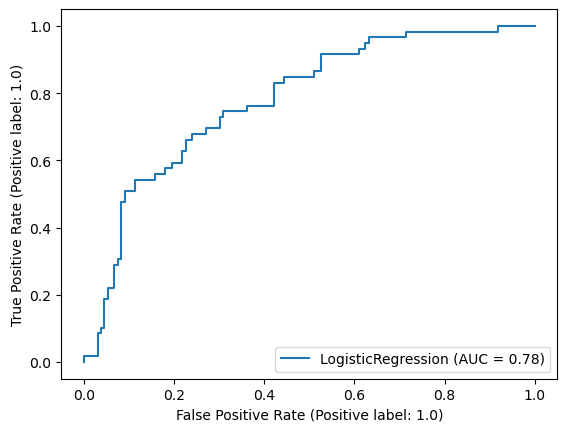

In [52]:
#ROC and AUC
plot_roc_curve(lr, X_test, y_test)
plt.show()

# KNN model

In [53]:
# fit model on training data
knn = KNeighborsClassifier()

In [54]:
#Elbow Method
acc = list()
for n in range(2, int(np.sqrt(X_train.shape[0]))):
    knn = KNeighborsClassifier(n_neighbors=n)
    acc.append(cross_val_score(knn, X, y, cv = 5).mean())


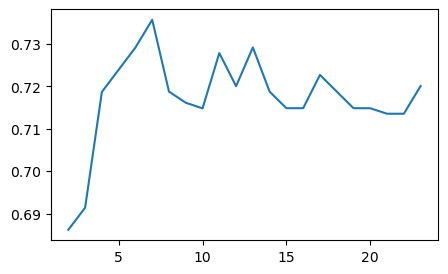

In [55]:
plt.figure(figsize=(5,3))
plt.plot(range(2, int(np.sqrt(X_train.shape[0]))), acc)
plt.show()

In [56]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train).score(X_train,y_train)

0.7899305555555556

In [57]:
# predict using knn model
knn_ypredict = knn.predict(X_test)

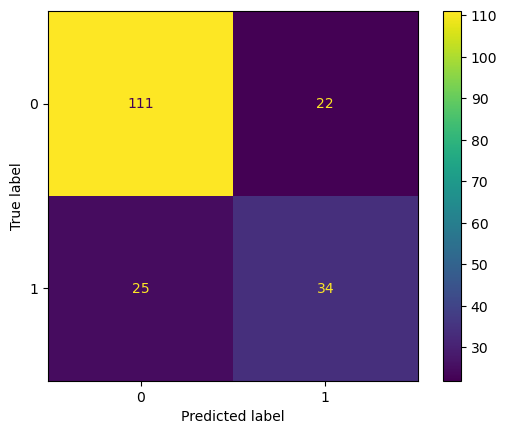

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_ypredict)
ConfusionMatrixDisplay(knn_cm).plot()
plt.show()

In [59]:
knn_accuracy = metrics.accuracy_score(y_test, knn_ypredict)
print("The accuracy score is :", knn_accuracy)

The accuracy score is : 0.7552083333333334


In [60]:
#Classification Report
print(classification_report(y_test, knn_ypredict))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       133
         1.0       0.61      0.58      0.59        59

    accuracy                           0.76       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.75      0.76      0.75       192



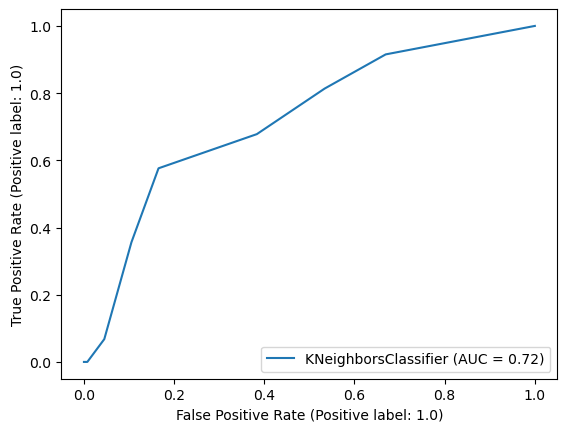

In [61]:
#ROC and AUC
plot_roc_curve(knn, X_test, y_test)
plt.show()

# Random Forest Model

In [62]:
# fit model on training data
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
print('Train Score: {}'.format(rfc.score(X_train, y_train)))  
print('Test Score: {}'.format(rfc.score(X_test, y_test)))  

Train Score: 1.0
Test Score: 0.7291666666666666


In [64]:
cross_val_score(rfc, X_train,y_train, cv=5).mean()

0.7604047976011994

In [65]:
#Our model looks overfitted as per the test and train scores above
#Applying grid search CV
param_grid = {
    'n_estimators': [20, 50, 100, 150,200],
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [3, 5, 7, 9]
}

gscv_rf = GridSearchCV(rfc, param_grid, cv=5, verbose=1)
gscv_rf.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'n_estimators': [20, 50, 100, 150, 200]},
             verbose=1)

In [66]:
gscv_rf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200)

In [67]:
random_forest = gscv_rf.best_estimator_
rf_ypredict = random_forest.predict(X_test)

In [68]:
print('Train Score: {}'.format(random_forest.score(X_train, y_train)))  
print('Test Score: {}'.format(random_forest.score(X_test, y_test))) 

Train Score: 0.8454861111111112
Test Score: 0.7395833333333334


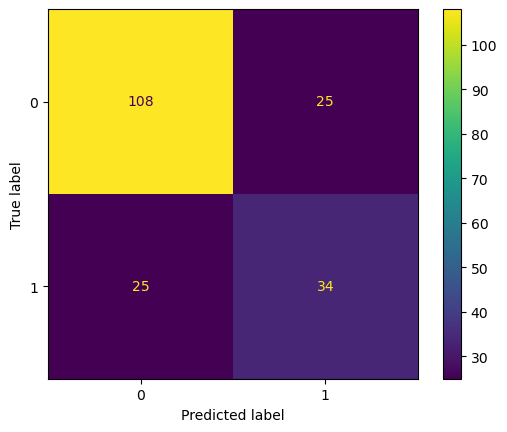

In [69]:
#Confusion Matrix
cm_rf = confusion_matrix(rf_ypredict, y_test)
ConfusionMatrixDisplay(cm_rf).plot()
plt.show()

In [70]:
#Classification Report
print(classification_report(rf_ypredict, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       133
         1.0       0.58      0.58      0.58        59

    accuracy                           0.74       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.74      0.74      0.74       192



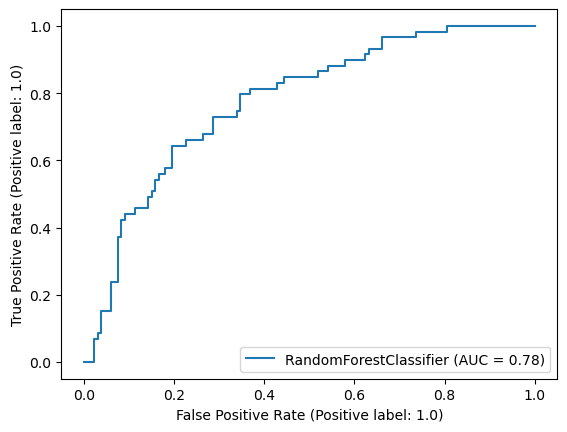

In [71]:
#ROC and AUC
plot_roc_curve(random_forest, X_test, y_test)
plt.show()

# Decison Tree 

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtree =  DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
print('Train Score: {}'.format(dtree.score(X_train, y_train)))  
print('Test Score: {}'.format(dtree.score(X_test, y_test)))  

Train Score: 1.0
Test Score: 0.65625


In [74]:
cross_val_score(dtree, X_train, y_train, cv=5).mean()

0.7256371814092953

In [75]:
#Our model looks overfitted as per the test and train scores above
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_leaf': [3, 5, 7, 9]
}

gscv = GridSearchCV(dtree, param_grid, cv=5, verbose=1)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [3, 5, 7, 9]},
             verbose=1)

In [76]:
gscv.best_estimator_

DecisionTreeClassifier(min_samples_leaf=9)

In [77]:
cross_val_score(gscv.best_estimator_, X_train, y_train, cv=5).mean() 
#we can see model has improved. we will use this best estimators to built our model.

0.7639130434782608

In [78]:
clf = gscv.best_estimator_
dtree_ypredict = clf.predict(X_test)

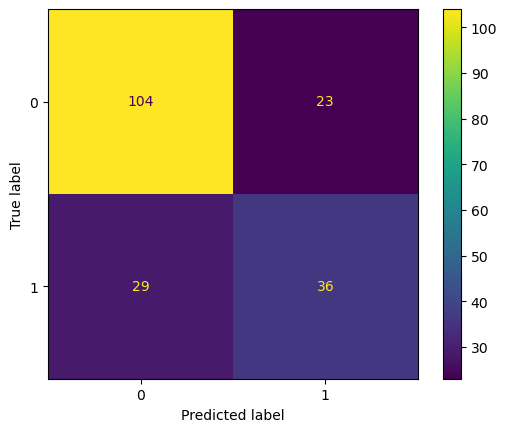

In [79]:
#Confusion Matrix
dtree_cm = confusion_matrix(dtree_ypredict, y_test)
ConfusionMatrixDisplay(dtree_cm).plot()
plt.show()

In [80]:
#Classification Report
print(classification_report(dtree_ypredict, y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       127
         1.0       0.61      0.55      0.58        65

    accuracy                           0.73       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.72      0.73      0.73       192



# Support Vector Machines

In [81]:
# fit model on training data
svc= SVC()
svc.fit(X_train, y_train)

SVC()

In [82]:
print('Train Score: {}'.format(svc.score(X_train, y_train)))  
print('Test Score: {}'.format(svc.score(X_test,y_test)))   

Train Score: 0.7378472222222222
Test Score: 0.75


In [83]:
cross_val_score(svc, X_train, y_train, cv=5).mean()

0.6978710644677661

In [84]:
# Tuning Hyperparameters of SVM using GridSearch
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

In [85]:
gscv = GridSearchCV(svc, param_grid, cv=5, verbose=1)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             verbose=1)

In [86]:
gscv.best_params_

{'C': 10, 'gamma': 0.001}

In [87]:
gscv.best_estimator_

SVC(C=10, gamma=0.001)

In [88]:
svm = gscv.best_estimator_
pred_y_svm = svm.predict(X_test)

In [89]:
print('Train Score: {}'.format(svm.score(X_train, y_train)))  
print('Test Score: {}'.format(svm.score(X_test,y_test))) 

Train Score: 0.7916666666666666
Test Score: 0.7708333333333334


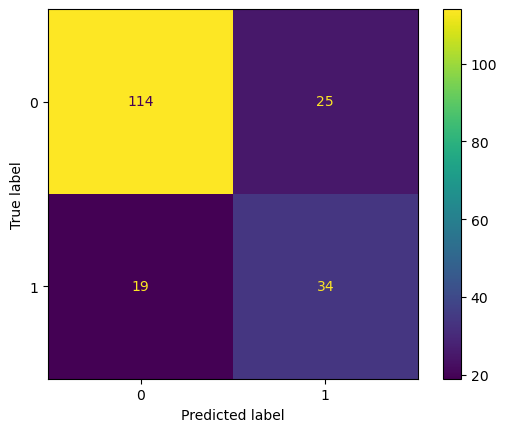

In [90]:
#Confusion Matrix
cm_svm = confusion_matrix(pred_y_svm, y_test)
ConfusionMatrixDisplay(cm_svm).plot()
plt.show()

In [91]:
#Classification Report
print(classification_report(pred_y_svm, y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       139
         1.0       0.58      0.64      0.61        53

    accuracy                           0.77       192
   macro avg       0.72      0.73      0.72       192
weighted avg       0.78      0.77      0.77       192



Based on our analysis, it appears that the "Support Vector Machines (SVM)" model is most effective at predicting whether a patient is diabetic or not for this diabetes dataset.